In [1]:
import numpy as np
import pandas as pd
from pycaret.classification import *
import datetime
import matplotlib.pyplot as plt
import glob 
import os 

test_start = '2023-01-01'
fix = 713
data_1_size = 4522     ###### 测试数据行数  ###############

part = '20250424_003413_oMFt2l'
dir = f'E:/dragon/GA_Shane/outputs/{part}/'
os.chdir(dir)
os.makedirs('./temp',exist_ok=True)
# Remove all files that start with numbers in the current directory
for file in os.listdir('./temp'):
    if file[0].isdigit():
        os.remove('./temp/'+file)

train_path = glob.glob(os.path.join(dir,f'*_Train_{fix}_*.csv'))[0]
test_path = glob.glob(os.path.join(dir,f'*_Test_{fix}_*_PCA.csv'))[0]

assert str(data_1_size) in test_path

dataset_s = pd.read_csv(train_path)   ############# 训练集文件 ####################
dataset = dataset_s

num_xunlian = len(dataset_s)

# dataset.replace([np.inf, -np.inf], np.nan, inplace=True)   ####替换正负inf为NA


m_size = 25     ####### 测试多少个月 #######
buy = 1     ##### 多 ###################
sell = 0     ##### 空 ####################
rrr = 0.25     ###### 系数 ###################
m = 1000     ###### 总资金 ###################

print(train_path)
print(test_path)

assert len(dataset['A0'].unique()) > 1

dataset.tail()

E:/dragon/GA_Shane/outputs/20250424_003413_oMFt2l\RB99_1m_output_axis.csv_Train_713_32994.csv
E:/dragon/GA_Shane/outputs/20250424_003413_oMFt2l\RB99_1m_output_axis.csv_Test_713_4522_PCA.csv


,A0,A0_p,open_diff_1,high_diff_1,low_diff_1,close_diff_1,volume_diff_1,open_diff_3,high_diff_3,low_diff_3,...,o2c_mean_9_shift_9,t2p_mean_9_shift_9,open_frac_shift_9,high_frac_shift_9,low_frac_shift_9,close_frac_shift_9,open_sample_entropy_shift_9,high_sample_entropy_shift_9,low_sample_entropy_shift_9,close_sample_entropy_shift_9
32989,1.0,0.499973,0.007037,0.000206,0.004221,-0.000725,-0.359497,0.003560,-0.001666,0.001090,...,-0.000120,0.003049,0.007892,0.006141,0.008340,0.003652,1.488041,0.843460,0.926358,1.591414
32990,1.0,0.499980,-0.000720,0.002195,0.001982,0.002251,0.028517,0.004395,0.007571,0.005807,...,-0.000032,0.002961,0.003504,0.000805,0.000506,0.003947,1.690703,0.220232,1.702160,2.152386
32991,1.0,0.498977,0.002243,0.002763,0.002286,0.001886,0.130091,0.008559,0.005164,0.008489,...,-0.000051,0.002980,0.003763,0.005622,0.004770,0.005221,1.715427,0.046750,1.712949,1.488956
32992,1.0,0.421159,0.001995,0.000968,0.002929,0.000723,0.169290,0.003518,0.005927,0.007197,...,0.000138,0.002791,0.005400,0.004206,0.006309,0.002585,1.166501,-0.134646,1.005523,0.475450
32993,0.0,0.494317,0.000670,-0.000944,-0.002947,-0.003957,-0.335743,0.004908,0.002787,0.002268,...,-0.000023,0.002665,0.002634,0.000736,0.001132,0.002708,0.544179,-0.044809,0.721340,0.589043


In [2]:
dataset = dataset.drop(columns=['A0_p'])

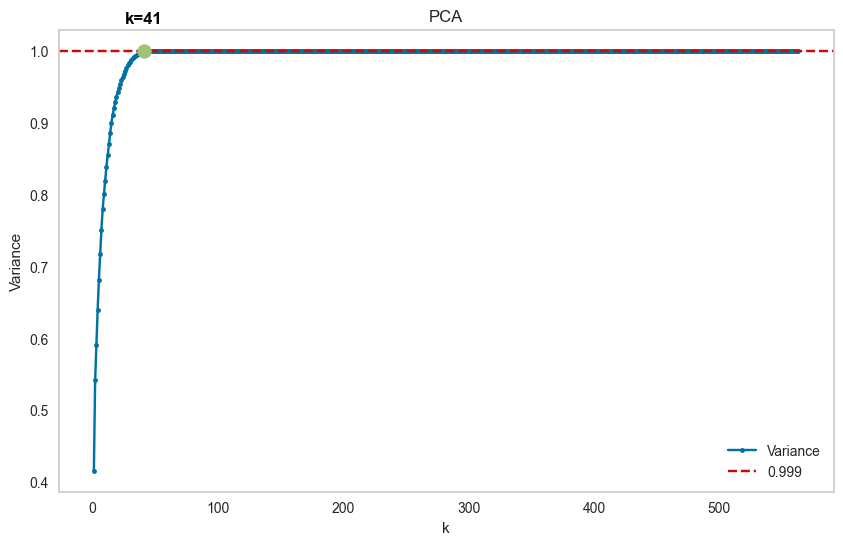

[41, 43, 47, 139, 277, 281, 557, 563]


,Description,Value
0,Session id,369
1,Target,A0
2,Target type,Binary
3,Original data shape,"(32994, 564)"
4,Transformed data shape,"(32994, 42)"
5,Transformed train set shape,"(23095, 42)"
6,Transformed test set shape,"(9899, 42)"
7,Numeric features,563
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9100,0.9632,0.9420,0.9086,0.9250,0.8125,0.8133
1,0.9221,0.9675,0.9442,0.9251,0.9345,0.8383,0.8386
2,0.9212,0.9685,0.9545,0.9155,0.9346,0.8357,0.8368
3,0.9203,0.9639,0.9449,0.9219,0.9333,0.8345,0.8349
4,0.9247,0.9713,0.9457,0.9280,0.9367,0.8437,0.8439
5,0.9194,0.9676,0.9493,0.9170,0.9329,0.8323,0.8331
6,0.9173,0.9655,0.9486,0.9143,0.9311,0.8277,0.8286
7,0.9173,0.9625,0.9420,0.9197,0.9307,0.8282,0.8286
8,0.9220,0.9696,0.9508,0.9197,0.9350,0.8377,0.8385


Transformation Pipeline and Model Successfully Saved


,Description,Value
0,Session id,369
1,Target,A0
2,Target type,Binary
3,Original data shape,"(32994, 564)"
4,Transformed data shape,"(32994, 44)"
5,Transformed train set shape,"(23095, 44)"
6,Transformed test set shape,"(9899, 44)"
7,Numeric features,563
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9173,0.9684,0.9456,0.9167,0.9309,0.8280,0.8286
1,0.9268,0.9699,0.9478,0.9294,0.9385,0.8482,0.8485
2,0.9225,0.9729,0.9545,0.9174,0.9356,0.8385,0.8395
3,0.9169,0.9656,0.9427,0.9185,0.9304,0.8273,0.8277
4,0.9238,0.9735,0.9471,0.9254,0.9361,0.8418,0.8421
5,0.9225,0.9713,0.9515,0.9197,0.9354,0.8386,0.8394
6,0.9216,0.9732,0.9537,0.9167,0.9348,0.8366,0.8376
7,0.9186,0.9680,0.9456,0.9186,0.9319,0.8307,0.8312
8,0.9242,0.9702,0.9500,0.9236,0.9366,0.8424,0.8429


Transformation Pipeline and Model Successfully Saved


,Description,Value
0,Session id,369
1,Target,A0
2,Target type,Binary
3,Original data shape,"(32994, 564)"
4,Transformed data shape,"(32994, 48)"
5,Transformed train set shape,"(23095, 48)"
6,Transformed test set shape,"(9899, 48)"
7,Numeric features,563
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9195,0.9724,0.9500,0.9164,0.9329,0.8323,0.8332
1,0.9316,0.9740,0.9515,0.9337,0.9425,0.8581,0.8584
2,0.9216,0.9749,0.9508,0.9191,0.9347,0.8369,0.8376
3,0.9242,0.9707,0.9457,0.9273,0.9364,0.8428,0.8430
4,0.9273,0.9786,0.9479,0.9301,0.9389,0.8491,0.8493
5,0.9259,0.9744,0.9552,0.9220,0.9383,0.8458,0.8466
6,0.9220,0.9740,0.9566,0.9150,0.9353,0.8373,0.8386
7,0.9225,0.9705,0.9471,0.9234,0.9351,0.8389,0.8393
8,0.9251,0.9741,0.9544,0.9213,0.9376,0.8440,0.8448


Transformation Pipeline and Model Successfully Saved


,Description,Value
0,Session id,369
1,Target,A0
2,Target type,Binary
3,Original data shape,"(32994, 564)"
4,Transformed data shape,"(32994, 140)"
5,Transformed train set shape,"(23095, 140)"
6,Transformed test set shape,"(9899, 140)"
7,Numeric features,563
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9777,0.9508,0.9296,0.9401,0.8517,0.8520
1,0.9377,0.9785,0.9633,0.9331,0.9479,0.8703,0.8710
2,0.9307,0.9777,0.9626,0.9232,0.9425,0.8555,0.8567
3,0.9355,0.9756,0.9589,0.9335,0.9460,0.8659,0.8664
4,0.9346,0.9826,0.9559,0.9347,0.9452,0.8643,0.8646
5,0.9329,0.9794,0.9618,0.9271,0.9441,0.8602,0.8611
6,0.9337,0.9797,0.9574,0.9320,0.9445,0.8623,0.8628
7,0.9233,0.9746,0.9449,0.9265,0.9356,0.8409,0.8412
8,0.9324,0.9777,0.9566,0.9307,0.9435,0.8596,0.8601


Transformation Pipeline and Model Successfully Saved


,Description,Value
0,Session id,369
1,Target,A0
2,Target type,Binary
3,Original data shape,"(32994, 564)"
4,Transformed data shape,"(32994, 278)"
5,Transformed train set shape,"(23095, 278)"
6,Transformed test set shape,"(9899, 278)"
7,Numeric features,563
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9290,0.9755,0.9515,0.9296,0.9405,0.8526,0.8529
1,0.9342,0.9779,0.9552,0.9346,0.9448,0.8634,0.8637
2,0.9273,0.9772,0.9611,0.9192,0.9397,0.8482,0.8495
3,0.9325,0.9762,0.9559,0.9313,0.9435,0.8596,0.8601
4,0.9290,0.9811,0.9508,0.9303,0.9405,0.8526,0.8529
5,0.9363,0.9782,0.9618,0.9323,0.9468,0.8676,0.8682
6,0.9268,0.9781,0.9522,0.9257,0.9388,0.8478,0.8484
7,0.9268,0.9744,0.9493,0.9282,0.9386,0.8480,0.8484
8,0.9316,0.9768,0.9581,0.9281,0.9429,0.8576,0.8583


Transformation Pipeline and Model Successfully Saved


,Description,Value
0,Session id,369
1,Target,A0
2,Target type,Binary
3,Original data shape,"(32994, 564)"
4,Transformed data shape,"(32994, 282)"
5,Transformed train set shape,"(23095, 282)"
6,Transformed test set shape,"(9899, 282)"
7,Numeric features,563
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9749,0.9486,0.9315,0.9399,0.8519,0.8521
1,0.9377,0.9774,0.9611,0.9350,0.9478,0.8704,0.8710
2,0.9355,0.9774,0.9633,0.9298,0.9463,0.8657,0.8665
3,0.9333,0.9750,0.9581,0.9308,0.9443,0.8614,0.8619
4,0.9316,0.9820,0.9545,0.9312,0.9427,0.8579,0.8583
5,0.9333,0.9774,0.9640,0.9259,0.9446,0.8610,0.8621
6,0.9298,0.9782,0.9530,0.9297,0.9412,0.8542,0.8546
7,0.9229,0.9724,0.9434,0.9271,0.9352,0.8401,0.8403
8,0.9355,0.9758,0.9581,0.9341,0.9460,0.8659,0.8664


Transformation Pipeline and Model Successfully Saved


,Description,Value
0,Session id,369
1,Target,A0
2,Target type,Binary
3,Original data shape,"(32994, 564)"
4,Transformed data shape,"(32994, 558)"
5,Transformed train set shape,"(23095, 558)"
6,Transformed test set shape,"(9899, 558)"
7,Numeric features,563
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9268,0.9749,0.9515,0.9263,0.9387,0.8480,0.8484
1,0.9372,0.9768,0.9625,0.9330,0.9476,0.8694,0.8701
2,0.9286,0.9781,0.9574,0.9242,0.9405,0.8512,0.8521
3,0.9286,0.9745,0.9545,0.9266,0.9403,0.8514,0.8520
4,0.9268,0.9802,0.9486,0.9288,0.9386,0.8481,0.8484
5,0.9320,0.9782,0.9633,0.9245,0.9435,0.8582,0.8594
6,0.9255,0.9783,0.9493,0.9262,0.9376,0.8453,0.8456
7,0.9277,0.9737,0.9478,0.9307,0.9392,0.8500,0.8502
8,0.9307,0.9773,0.9544,0.9298,0.9420,0.8560,0.8565


Transformation Pipeline and Model Successfully Saved


,Description,Value
0,Session id,369
1,Target,A0
2,Target type,Binary
3,Original data shape,"(32994, 564)"
4,Transformed data shape,"(32994, 564)"
5,Transformed train set shape,"(23095, 564)"
6,Transformed test set shape,"(9899, 564)"
7,Numeric features,563
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9268,0.9742,0.9508,0.9269,0.9387,0.8480,0.8484
1,0.9351,0.9767,0.9603,0.9316,0.9457,0.8650,0.8656
2,0.9303,0.9782,0.9574,0.9268,0.9419,0.8549,0.8556
3,0.9320,0.9749,0.9581,0.9288,0.9433,0.8586,0.8592
4,0.9273,0.9804,0.9515,0.9270,0.9391,0.8488,0.8493
5,0.9285,0.9776,0.9589,0.9229,0.9405,0.8511,0.8521
6,0.9290,0.9786,0.9515,0.9296,0.9405,0.8525,0.8529
7,0.9277,0.9747,0.9508,0.9283,0.9394,0.8498,0.8501
8,0.9316,0.9768,0.9559,0.9299,0.9428,0.8578,0.8583


Transformation Pipeline and Model Successfully Saved


In [3]:
from sklearn.decomposition import PCA

num = 0.999

pca = PCA()
pca.fit(dataset.drop(columns=['A0']))    ### 如果做标准化，就用 data_scaled

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
k = np.argmax(cumulative_explained_variance >= num) + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='.', label='Variance')
plt.axhline(y=num, color='r', linestyle='--', label=str(num))
plt.scatter(k, cumulative_explained_variance[k-1], color='g', s=100, zorder=5)
plt.annotate(f'k={k}', (k, cumulative_explained_variance[k-1]), 
             textcoords="offset points", xytext=(0, 20), ha='center', 
             fontsize=12, fontweight='bold', color='black')

plt.title('PCA')
plt.xlabel('k')
plt.ylabel('Variance')
plt.grid()
plt.legend()
plt.savefig("PCA.jpg")
plt.show()




res1 = []
res2 = []
res3 = []
res4 = []
res5 = []
res6 = []
res7 = []


resP = []
resR = []
resF = []


def unique_primes(start, n=10, k = 10 ):
    def pf(x):
        factors = set()
        while x % 2 == 0:
            factors.add(2)
            x //= 2
        i = 3
        while i*i <= x:
            while x % i == 0:
                factors.add(i)
                x //= i
            i += 2
        if x > 1:
            factors.add(x)
        return [ f for f in factors if f >= k-3 ]
    return sorted(set().union(*(pf(x) for x in range(start-n, start+1))))

# Example usage:
param_list = unique_primes(dataset_s.shape[1]-1, 10,k=k)
if k not in param_list:
    param_list = [k]+param_list
print(param_list)

for j in param_list:
    num = j
    s = setup(dataset, target = 'A0', session_id = 369, pca = True, pca_components = num)
    
    
    # abc = create_model('xgboost')  ################  xgboost,lightgbm,catboost #############
    
    # abc = create_model('xgboost', objective='binary:logitraw')  ################  不同的目标函数  #############
    
    abc = create_model('lightgbm', objective='xentlambda')  ################  不同的目标函数  #############
    
    # abc = create_model('catboost', objective='CrossEntropy')   ################  不同的目标函数  #############
    # compare_tree_models = compare_models(include = ['rf', 'xgboost', 'lightgbm', 'catboost'])

    
    abc_results = pull()
    abc_results = abc_results.loc[['Mean']]
    abc_results.to_csv('./temp/'+str(j)+f'r_{fix}.csv',index = False)
    
    final_best = finalize_model(abc)
    save_model(final_best, './temp/' + str(num) + 'x')
    data = pd.read_csv(test_path) #########  测试集文件  ########################
    
#     data.replace([np.inf, -np.inf], np.nan, inplace=True)   ####替换正负inf为NA
    
    predictions = predict_model(final_best, data=data) 
    
    n_preds = predictions['prediction_label'][num_xunlian:(num_xunlian+data_1_size)]    ### 取中间的数据
    n_preds = n_preds.reset_index(drop=True)                      ### 重置索引
    
    Note=open('./temp/' + str(num) + 'x.txt',mode='a')
    for i in range(0,data_1_size):         
        Note.write(str(n_preds[i]) + '\n') 
    Note.close()

    n_preds_score = predictions['prediction_score'][num_xunlian:(num_xunlian+data_1_size)]      ### 取中间的数据
    n_preds_score = n_preds_score.reset_index(drop=True)                   ### 重置索引
    
    Note=open('./temp/' + str(num) + 's.txt',mode='a')
    for i in range(0,data_1_size):         
        Note.write(str(n_preds_score[i]) + '\n') 
    Note.close()
    
    
    
    
    file_name ='./temp/Show.csv'
    df = pd.read_csv(file_name)
    path = './temp/'+str(j)+'x.txt'
    df2 = pd.read_csv(path, header=None, names=['state_x'])
    for i in range(0,data_1_size):  
        df['low'][i] = df2['state_x'][i]
   
    

    path = './temp/'+str(j)+'s.txt'
    df2 = pd.read_csv(path, header=None, names=['state_x'])
    df['score'] = 0
    for i in range(0,data_1_size):  
        df['score'][i] = df2['state_x'][i]
    df.to_csv('./temp/'+str(j)+f'x_{fix}.csv',index = False)
    
    
    
    
 

    file_name='./temp/'+  str(j) + f'x_{fix}.csv'
    data_1_new = pd.read_csv(file_name)

    aaa1 = data_1_new['volume']
    bbb1 = data_1_new['low']

    if buy == 0:
        for i in range(0,data_1_size):
            if bbb1.iloc[i] == 1:
                aaa1.iloc[i] = aaa1.iloc[i] * -1
    else:
        for i in range(0,data_1_size):
            if bbb1.iloc[i] == 0:
                aaa1.iloc[i] = aaa1.iloc[i] * -1

    for i in range(1,data_1_size):
        data_1_new['high'][i] = sum(data_1_new['volume'][0:(i+1)])

    data_1_new['high'][0] = data_1_new['volume'][0]

    for i in range(0,data_1_size):
        data_1_new['open'][i] = rrr * data_1_new['high'][i] / m


        
######################################################################################################


    wp_win = data_1_new['volume'] > 0
    wp_lost = data_1_new['volume'] < 0
    wp_nothing = data_1_new['volume'] == 0

    ### 满足条件的数量

    wp_win_a = wp_win.sum()            
    wp_lost_a = wp_lost.sum()
    wp_nothing_a = wp_nothing.sum()


    ### 满足条件的数据之和

    rrr_win = data_1_new[wp_win]['volume'].sum()
    rrr_lost = data_1_new[wp_lost]['volume'].sum()




    ##############################################################################################
    # 计算回撤数据，给到 down 列
    
    data_1_new['down'] = 0

    log = data_1_new['open'].iloc[0]

    for i in range(1,len(data_1_new)):

        if data_1_new['open'].iloc[i] < log:
            data_1_new['down'].iloc[i] = data_1_new['open'].iloc[i] - log
        else:
            log = data_1_new['open'].iloc[i]
        
    
    ##############################################################################################
    # 计算回撤面积，给到downarea列
    
    downarea = sum(data_1_new['down'])
    
    
    
    
    ##############################################################################################
    
    
    
    
    
    # 增加二级模型用到的列
    
    data_1_new['re'] = 0
    for i in range(1,len(data_1_new)):
        data_1_new['re'].iloc[i] = (data_1_new['close'].iloc[i] - data_1_new['close'].iloc[i-1]) / data_1_new['close'].iloc[i-1] * 100
        
    
    
    data_1_new['real'] = 0
    for i in range(1,len(data_1_new)):
        if data_1_new['close'].iloc[i] < data_1_new['close'].iloc[i-1]:
            data_1_new['real'].iloc[i] = 0
        else:
            data_1_new['real'].iloc[i] = 1
            
            
            
    data_1_new['real_lab'] = 'G'
    for i in range(1,len(data_1_new)):
        if buy == 0:
            if data_1_new['low'].iloc[i] != data_1_new['real'].iloc[i]:
                data_1_new['real_lab'].iloc[i] = 'G'
            else:
                data_1_new['real_lab'].iloc[i] = 'N'
        else:
            if data_1_new['low'].iloc[i] == data_1_new['real'].iloc[i]:
                data_1_new['real_lab'].iloc[i] = 'G'
            else:
                data_1_new['real_lab'].iloc[i] = 'N'
            
            
    file_name ='./temp/Show.csv'
    df = pd.read_csv(file_name)        
    data_1_new['show'] = df['low']
    
    
    
    data_1_new['show_lab'] = 'G'
    for i in range(1,len(data_1_new)):        
        if data_1_new['low'].iloc[i] == data_1_new['show'].iloc[i]:
            data_1_new['show_lab'].iloc[i] = 'G'
        else:
            data_1_new['show_lab'].iloc[i] = 'N'

        
      
    
    ##############################################################################################
    
    ### 计算夏普与索提诺
    
    data_1_new['re_real'] = 0
    for i in range(1,len(data_1_new)):
        if sell == 0:
            if data_1_new['low'].iloc[i] == 0:
                data_1_new['re_real'].iloc[i] = data_1_new['re'].iloc[i] * -1
            else:
                data_1_new['re_real'].iloc[i] = data_1_new['re'].iloc[i]
        else:
            if data_1_new['low'].iloc[i] == 1:
                data_1_new['re_real'].iloc[i] = data_1_new['re'].iloc[i] * -1
            else:
                data_1_new['re_real'].iloc[i] = data_1_new['re'].iloc[i]
    
    sharpe = round(data_1_new['re_real'][1:].mean() / data_1_new['re_real'][1:].std() * 100,4)
    
    sortino = round(data_1_new['re_real'][1:].mean() / (data_1_new['re_real'][1:][data_1_new['re_real'][1:] < 0]).std() * 100,4)
    
    ##############################################################################################
    
    
    
    
    
    
    data_1_new.to_csv('./temp/'+str(j)+f'x_{fix}.csv',index = False)
    
    
    
    
    s = np.argmax((np.maximum.accumulate(data_1_new['open']) - data_1_new['open'])) 
    if s == 0:
        e = 0
    else:
        e = np.argmax(data_1_new['open'][:s])  
    maxdrawdown = data_1_new['open'][e] - data_1_new['open'][s] # 最大回撤
    drawdown_days = s - e # 回撤持续周期数
    
    
    
    
    start_DAY = data_1_new.index[s] #开始回撤的日期
    end_DAY = data_1_new.index[e] #结束回撤的日期
    start_net_value = data_1_new[data_1_new.index == start_DAY]['open'].values[0] #开始回撤的净值
    end_net_value = data_1_new[data_1_new.index == end_DAY]['open'].values[0] #结束回撤的净值
    fig=plt.figure(figsize=(20,11))  
    plt.plot(data_1_new['eob'], data_1_new['open'])
    plt.plot([start_DAY, end_DAY], [start_net_value, end_net_value], linestyle='--', color='r')

    plt.xticks(range(0,data_1_size,int(data_1_size/m_size))) 

    plt.legend(['All:' + str(round(data_1_new['open'].iloc[-1]*100,2)) + '%' +
                '   ' + str(m_size) + 'm'
                '   Year:'+ str(round(data_1_new['open'].iloc[-1]/m_size*100*12,2)) + '%' +
                '   CalmarY:'+ str(round((data_1_new['open'].iloc[-1]/m_size*100*12)/(maxdrawdown*100),2)) +
                '   WP:' + str(round(wp_win_a/(wp_win_a + wp_lost_a)*100,2)) + '%' +
                '   RRR:' + str(round(rrr_win/(rrr_win+abs(rrr_lost))*100,2)) + '%' + ' / ' + str(round(rrr_win/abs(rrr_lost),2)) +
                '   T/N:' + str(wp_win_a + wp_lost_a ) + ' / ' + str(wp_nothing_a) +
                '   Sharpe:' + str(sharpe) +
                '   Sortino:' + str(sortino) +
                '   Accuracy:' + str(abc_results['Accuracy'][0]) +
                '   AUC:' + str(abc_results['AUC'][0]) +
                '   Recall:' + str(abc_results['Recall'][0]) +
                '   Prec:' + str(abc_results['Prec.'][0]) +
                '   F1:' + str(abc_results['F1'][0]) +
                '   Kappa:' + str(abc_results['Kappa'][0]) +
                '   MCC:' + str(abc_results['MCC'][0]),

                'MD:'+ str(round(maxdrawdown*100,2)) + '%' +
                '   DA:'+ str(round(downarea,4)) + '%' +
                '   MDT:' + str(drawdown_days)+
                '   Date:' + str(data_1_new['eob'].iloc[e]) + ' - ' + str(data_1_new['eob'].iloc[s])] ,

                loc='upper left',fontsize = 11)   ########### 默认是10
    
    
    plt.plot(data_1_new['eob'], data_1_new['down'], color='#ec700a')   ### 桔色
    plt.fill_between(data_1_new['eob'], data_1_new['down'], 0, where=(data_1_new['down']<0), facecolor='#FF0000', alpha=0.1)   
    plt.xticks(range(0,data_1_size,int(data_1_size/m_size)))                                           ### 红色 + 透明度
           

    
    fig.autofmt_xdate()
    plt.grid(1)
    plt.savefig("./temp/" + str(j) + "sy.jpg")
    plt.close()


    fig=plt.figure(figsize=(20,10))  
    plt.plot(data_1_new['eob'], data_1_new['high'])
    plt.xticks(range(0,data_1_size,int(data_1_size/m_size)))     ### 最后一个是间隔
    fig.autofmt_xdate()
    plt.grid(1)
    plt.savefig("./temp/" + str(j) + "p.jpg")
    plt.close()
    

    
    ##############################################################################################
    
    
    pp = abc_results['Prec.'][0]
    resP.append({
        'Prec_no': j,
        'max_Prec': pp
    })
    
    rr = abc_results['Recall'][0]
    resR.append({
        'Recall_no': j,
        'max_Recall': rr
    })
    
    ff = abc_results['F1'][0]
    resF.append({
        'F1_no': j,
        'max_F1': ff
    })
    

    
    
    ##############################################################################################
    
        

    max_all = round(data_1_new['open'].iloc[-1]*100,2)
    max_no = j

    res1.append({
        'All_no': max_no,
        'max_All': max_all
    })



    max_CalmarY = round((data_1_new['open'].iloc[-1]/m_size*100*12)/(maxdrawdown*100),2)
    
    res2.append({
        'CalmarY_no': max_no,
        'max_CalmarY': max_CalmarY
    })
    
    
    
    res3.append({
        'Downarea_no': max_no,
        'min_Downarea': downarea
    })
          
        
    max_wp = round(wp_win_a/(wp_win_a + wp_lost_a)*100,2)
    
    res4.append({
        'WP_no': max_no,
        'max_WP': max_wp
    })
    
    
    max_rrr = round(rrr_win/(rrr_win+abs(rrr_lost))*100,2)
    
    res5.append({
        'RRR_no': max_no,
        'max_RRR': max_rrr
    })
    
    
    res6.append({
        'Sharpe_no': max_no,
        'max_Sharpe': sharpe
    })
        
        
    res7.append({
        'Sortino_no': max_no,
        'max_Sortino': sortino
    })
    

   ##############################################################################################


aaaP = pd.DataFrame(resP)
aaaR = pd.DataFrame(resR)
aaaF = pd.DataFrame(resF)


bbbP = aaaP.sort_values(by="max_Prec",ascending=False)
bbbR = aaaR.sort_values(by="max_Recall",ascending=False)
bbbF = aaaF.sort_values(by="max_F1",ascending=False)


bbbP = bbbP.reset_index(drop=True)
bbbR = bbbR.reset_index(drop=True)
bbbF = bbbF.reset_index(drop=True)

bbbP['Recall_no'] = bbbR['Recall_no']
bbbP['max_Recall'] = bbbR['max_Recall']
bbbP['F1_no'] = bbbF['F1_no']
bbbP['max_F1'] = bbbF['max_F1']

bbbP.to_csv("./temp/Best_2.csv",index = False)


   ##############################################################################################



aaa1 = pd.DataFrame(res1)
aaa2 = pd.DataFrame(res2)
aaa3 = pd.DataFrame(res3)
aaa4 = pd.DataFrame(res4)
aaa5 = pd.DataFrame(res5)
aaa6 = pd.DataFrame(res6)
aaa7 = pd.DataFrame(res7)


bbb1 = aaa1.sort_values(by="max_All",ascending=False)       ### 由大到小排序
bbb2 = aaa2.sort_values(by="max_CalmarY",ascending=False)    
bbb3 = aaa3.sort_values(by="min_Downarea",ascending=False)     
bbb4 = aaa4.sort_values(by="max_WP",ascending=False)    
bbb5 = aaa5.sort_values(by="max_RRR",ascending=False)    
bbb6 = aaa6.sort_values(by="max_Sharpe",ascending=False)    
bbb7 = aaa7.sort_values(by="max_Sortino",ascending=False)   



bbb1 = bbb1.reset_index(drop=True)
bbb2 = bbb2.reset_index(drop=True)
bbb3 = bbb3.reset_index(drop=True)
bbb4 = bbb4.reset_index(drop=True)
bbb5 = bbb5.reset_index(drop=True)
bbb6 = bbb6.reset_index(drop=True)
bbb7 = bbb7.reset_index(drop=True)




bbb1['CalmarY_no'] = bbb2['CalmarY_no']
bbb1['max_CalmarY'] = bbb2['max_CalmarY']
bbb1['Downarea_no'] = bbb3['Downarea_no']
bbb1['min_Downarea'] = bbb3['min_Downarea']
bbb1['WP_no'] = bbb4['WP_no']
bbb1['max_WP'] = bbb4['max_WP']
bbb1['RRR_no'] = bbb5['RRR_no']
bbb1['max_RRR'] = bbb5['max_RRR']
bbb1['Sharpe_no'] = bbb6['Sharpe_no']
bbb1['max_Sharpe'] = bbb6['max_Sharpe']
bbb1['Sortino_no'] = bbb7['Sortino_no']
bbb1['max_Sortino'] = bbb7['max_Sortino']



bbb1.to_csv("./temp/Best_1.csv",index = False)







